In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [20]:
df = pd.read_csv("Employee Attrition Data.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
#Data Overview
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
print(df.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [6]:
#DATA PREPROCESSING

In [7]:
#Handling Missing Values
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
#Encoding the Categorical variables

In [21]:
df['Attrition']= df['Attrition'].map({'Yes': 1, 'No': 0})
df['Gender']= df['Gender'].map({'Male': 1, 'Female': 0})
df = pd.get_dummies(df, columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime'], drop_first = True)

In [22]:
#Feature Selection
features = ['Age', 'JobSatisfaction', 'MonthlyIncome', 'YearsAtCompany', 'Gender', 'TotalWorkingYears', 'NumCompaniesWorked', 'OverTime_Yes']
x = df[features]
y = df['Attrition']

In [23]:
#Feature Scalling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 42)

In [13]:
#Build and Train the Logistic Regression Model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

MODEL EVALUATION

In [14]:
#Prediction
y_pred = model.predict(x_test)

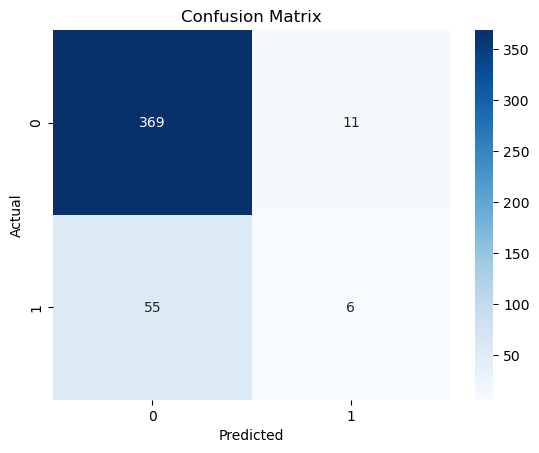

In [15]:
#Confision Matrics
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
#Classification Report
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100: 2f}%")

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       380
           1       0.35      0.10      0.15        61

    accuracy                           0.85       441
   macro avg       0.61      0.53      0.54       441
weighted avg       0.80      0.85      0.81       441

Accuracy:  85.034014%


In [17]:
#Feature Importance
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_[0]})
feature_importance.sort_values(by = 'Coefficient', ascending = False, inplace = True)
print(feature_importance)

              Feature  Coefficient
7        OverTime_Yes     0.723095
6  NumCompaniesWorked     0.440177
4              Gender     0.142999
3      YearsAtCompany     0.011819
2       MonthlyIncome    -0.191850
0                 Age    -0.312906
1     JobSatisfaction    -0.324789
5   TotalWorkingYears    -0.558535


In [18]:
#Example unseen data point
unseen_data = pd.DataFrame({
    'Age': [35],
    'JobSatisfaction': [4],
    'MonthlyIncome': [6500],
    'YearsAtCompany': [5],
    'Gender': [5],
    'TotalWorkingYears': [10],
    'NumCompaniesWorked': [2],
    'OverTime_Yes': [1] #Yes
})

#Scale the unseen data
unseen_data_scaled = scaler.transform(unseen_data)

#Make predictions
unseen_prediction = model.predict(unseen_data_scaled)
unseen_probability = model.predict_proba(unseen_data_scaled)

#Display Results
print(f"Predictin for unseeen data points: {'Attrition'if unseen_prediction[0] == 1 else 'No Attrition'}")
print(f"Prediction Probabilities: {unseen_probability[0]}")

Predictin for unseeen data points: Attrition
Prediction Probabilities: [0.4818881 0.5181119]
